# Introduction

The following document describes the functions and outputs of the BLE_objects.py file. To run this notebook you will need to upload BLE_objects.py to the Jupyter home directory where this file is running. This notebook will be updated with descriptions of other files as the project progresses. 

This code uses object orientated programming to make the functions prettier on the command line and to make it easier to add new BLE's.
The parent class is called 'BLE' and contains three functions alongside the standard __init__ function: __drange__, __graph__ and __arr__. These functions can be called by all BLE child classes, their outputs are described below. The child classes correspond to each BLE equation and consist of an equation for the ballistic region and an equation for the vapour region.

# The parent class

The variables are defined at the beginning of the parent class by the __init__ function as shown below. Data is imported from two excel files called __ShieldProperties.xlsx__ and __ProjectileProperties.xlsx__ that each contain different sheets for different shields and projectiles respectively.

When first using this class make sure to change the file directories of __ShieldProperties.xlsx__ and __ProjectileProperties.xlsx__ to the location of your stored files.

In [2]:
from BLE_objects import *

In [3]:
class BLE:
    def __init__(self, shieldsheet, projsheet):
        """
        This function defines the variables from a given shield sheet and
        projectile sheet
        """
        varis = pd.DataFrame(pd.read_excel(
            r'C:\Users\dalgl\OneDrive\Documents\4th year\GDP\Space-Shield-GDP\ShieldProperties.xlsx',
            sheet_name=shieldsheet, index_col=0,
            header=0, dtype={'denotion': str,
                             'Value': float}))
        # import data from excel sheet and convert to numpy array
        varip = pd.DataFrame(pd.read_excel(
            r'C:\Users\dalgl\OneDrive\Documents\4th year\GDP\Space-Shield-GDP\ProjectileProperties.xlsx',
            sheet_name=projsheet, index_col=0, header=0,
            dtype={'Value': float}))

        # convert pandas dataframe to numpy array
        varo = varis.values  
        vara = varip.values

        # Assign variables for shield
        self.S1 = varo[0, 1]
        self.t_ob = varo[1, 1]
        self.rho_b = varo[2, 1]
        self.Arho_b = varo[3, 1]
        self.Sigma = varo[4, 1]
        self.t_b = varo[5, 1]
        self.S2 = varo[6, 1]
        self.t_wall = varo[7, 1]
        # assign variablesfor projectile
        self.di = vara[0, 0]
        self.rho_p = vara[1, 0]
        # assign input variables 
        self.impact_angle = 0
        self.vel = 1
        # create dcrit arrays
        self.rngdcrit = []

        self.maxvel = 14
        self.minvel = 0.5
        # set shatter region limits
        # ideally shock analysis done to work this out
        self.v_shat = 3 # kms^-1
        self.v_vap = 7 # kms^-1

Each variable can be called individually from the parent and child classes.

In [8]:
print(BLE('Whipple', 'Al 6061-T6').Sigma)

print(Christiansen('Whipple', 'Al 6061-T6').Sigma)

56.9998
56.9998


__drange__ combines the ballistic, transition and vapour regions. It creates a transition region by linear interpolation between the ballistic function value at shatter velocity, v_shat, and the vapour function value at the velocity where the projectile  has completely melted, v_vap. It can only be called inside a child class.

__drange__ can also be used to extract a specific critical diameter in cm for a given velocity in kms^-1 in the range minvel-maxvel (set at 0.5 and 14 for this case). 

In [3]:
Christiansen('Whipple', 'Al 6061-T6').drange(4) # kms^-1

0.3628837549124363

__graph__ outputs a ballistic limit curve

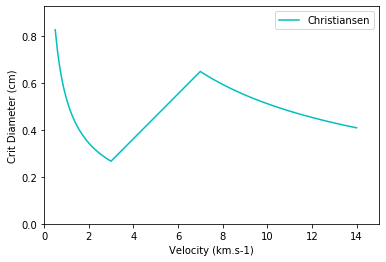

In [6]:
Christiansen('Whipple', 'Al 6061-T6').graph()

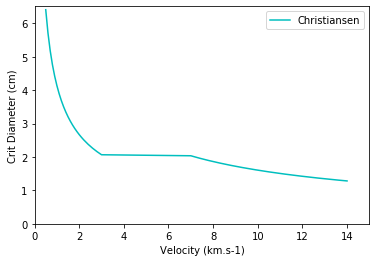

In [7]:
SRL('HC SW', 'Al 6061-T6').graph()

__arr__ outputs a 2D numpy array of critical diameters for a given ballistic limit equation. Examples of the execution are shown below and the outputs are given at the bottom of this notebook.

In [8]:
christarr = Christiansen('Whipple', 'Al 6061-T6').arr()

and

In [9]:
SRLarr = SRL('HC SW', 'Al 6061-T6').arr()

# The Child Class

The child cases inherit all the variables and functions from the parent case. Each child corresponds to an existing BLE and has two functions: one that describes behaviour in the ballistic region and one that describes behaviour in the vapour region. An example of a child class is shown below.

In [ ]:
class Christiansen(BLE):


    def crit_d_bal(self, vel, impact_angle=0):
        """
        Inputs: proj_vel is the particle velocity in the vapourised region
                the impact angle is a positive angle between 0 and 90 degrees
        Outputs:critcal projectile diameter for given velocity in the
                ballistic region
        """
        self.vel = vel
        self.impact_angle = impact_angle
        # determine angle in radians
        theta = self.impact_angle * (np.pi/180)
        # determine crit diameter
        dc = (((self.t_wall*((self.Sigma/40) ** 0.5) + self.t_ob) /
           (0.6*(np.cos(theta) ** (5/3)) * (self.rho_p ** 0.5)
            * ((self.vel) ** (2/3)))) ** (18/19))
        return dc


    def crit_d_vap(self, vel, impact_angle=0):
        """
        Inputs: proj_vel is the particle velocity in the vapourised region
                the impact angle is a positive angle between 0 and 90 degrees
        Outputs:critcal projectile diameter for given velocity in the
                ballistic region
        """
        self.vel = vel
        self.impact_angle = impact_angle
        # determine angle in radians
        theta = self.impact_angle * (np.pi/180)
        # determine crit diameter
        dc = (3.918 * self.t_wall ** (2/3) * self.S1 ** (1/3)
        * (self.Sigma/70) ** (1/3) * self.rho_p ** (-1/3)
        * self.rho_b ** (-1/9) * (self.vel * np.cos(theta)) ** (-2/3))
        return dc

For each child to work with functions in the parent class its two functions must have the names __crit_d_bal__ and __crit_d_vap__ that describe behaviour in the ballistic and vapour regions respectively.

In [10]:
christarr

array([[ 0.5       ,  0.82816223],
       [ 0.6       ,  0.73808471],
       [ 0.7       ,  0.66961323],
       [ 0.8       ,  0.61545674],
       [ 0.9       ,  0.5713348 ],
       [ 1.        ,  0.53455354],
       [ 1.1       ,  0.50332495],
       [ 1.2       ,  0.47641124],
       [ 1.3       ,  0.45292572],
       [ 1.4       ,  0.43221498],
       [ 1.5       ,  0.41378589],
       [ 1.6       ,  0.39725862],
       [ 1.7       ,  0.38233541],
       [ 1.8       ,  0.36877924],
       [ 1.9       ,  0.35639886],
       [ 2.        ,  0.34503806],
       [ 2.1       ,  0.33456791],
       [ 2.2       ,  0.32488096],
       [ 2.3       ,  0.31588683],
       [ 2.4       ,  0.30750897],
       [ 2.5       ,  0.29968201],
       [ 2.6       ,  0.29234979],
       [ 2.7       ,  0.28546373],
       [ 2.8       ,  0.27898163],
       [ 2.9       ,  0.27286659],
       [ 3.        ,  0.26708621],
       [ 3.1       ,  0.27666597],
       [ 3.2       ,  0.28624572],
       [ 3.3       ,

In [11]:
SRLarr

array([[ 0.5       ,  6.4122871 ],
       [ 0.6       ,  5.71483572],
       [ 0.7       ,  5.18467536],
       [ 0.8       ,  4.76535298],
       [ 0.9       ,  4.42372599],
       [ 1.        ,  4.13893638],
       [ 1.1       ,  3.89713995],
       [ 1.2       ,  3.68875272],
       [ 1.3       ,  3.50690926],
       [ 1.4       ,  3.34655032],
       [ 1.5       ,  3.2038577 ],
       [ 1.6       ,  3.07589047],
       [ 1.7       ,  2.96034321],
       [ 1.8       ,  2.85538064],
       [ 1.9       ,  2.7595219 ],
       [ 2.        ,  2.67155761],
       [ 2.1       ,  2.59048945],
       [ 2.2       ,  2.51548536],
       [ 2.3       ,  2.44584575],
       [ 2.4       ,  2.38097774],
       [ 2.5       ,  2.32037522],
       [ 2.6       ,  2.26360331],
       [ 2.7       ,  2.21028603],
       [ 2.8       ,  2.16009649],
       [ 2.9       ,  2.11274903],
       [ 3.        ,  2.06799275],
       [ 3.1       ,  2.06723633],
       [ 3.2       ,  2.06647992],
       [ 3.3       ,